In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [2]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [99]:
print('1 Min: ',iris['data'][:,0].min(),' Max: ' , iris['data'][:,0].max())
print('2 Min: ',iris['data'][:,1].min(),' Max: ' , iris['data'][:,1].max())
print('3 Min: ',iris['data'][:,2].min(),' Max: ' , iris['data'][:,2].max())
print('4 Min: ',iris['data'][:,3].min(),' Max: ' , iris['data'][:,3].max())

1 Min:  4.3  Max:  7.9
2 Min:  2.0  Max:  4.4
3 Min:  1.0  Max:  6.9
4 Min:  0.1  Max:  2.5


In [138]:
X1 = iris['data'][:,0].reshape(-1, 1)
X2 = iris['data'][:,1].reshape(-1, 1)
X3 = iris['data'][:,2].reshape(-1, 1)
X4 = iris['data'][:,3].reshape(-1, 1)
y = (iris['target'] == 2).astype(np.int32)

In [137]:
from sklearn.linear_model import LogisticRegression

log_reg1 = LogisticRegression()
log_reg2 = LogisticRegression()
log_reg3 = LogisticRegression()
log_reg4 = LogisticRegression()
log_reg1.fit(X1, y)
log_reg2.fit(X2, y)
log_reg3.fit(X3, y)
log_reg4.fit(X4, y)

LogisticRegression()

array([6.32632633])

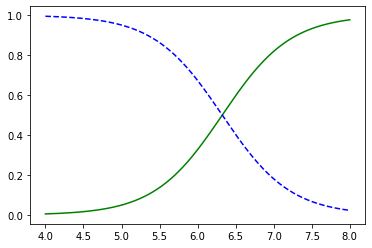

In [117]:
# 1 sepal length 
X_new1 = np.linspace(4, 8, 1000).reshape(-1, 1)
y_proba1 = log_reg1.predict_proba(X_new1)
plt.plot(X_new1, y_proba1[:, 1], "g-", label="Iris-Virginica") # _____
plt.plot(X_new1, y_proba1[:, 0], "b--", label="Not Iris-Virginica") # ------
decision_boundary1 = X_new1[y_proba1[:, 1] >= 0.5][0]
decision_boundary1

array([1.85585586])

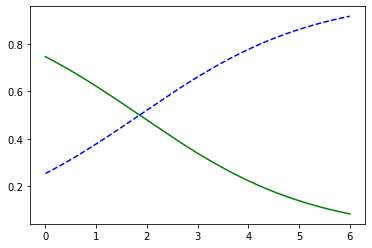

In [151]:
# 2 sepal width
X_new2 = np.linspace(0, 6, 1000).reshape(-1, 1)
y_proba2 = log_reg2.predict_proba(X_new2)
plt.plot(X_new2, y_proba2[:, 1], "g-", label="Iris-Virginica") # _____
plt.plot(X_new2, y_proba2[:, 0], "b--", label="Not Iris-Virginica") # ------
decision_boundary2 = X_new2[y_proba2[:, 0] >= 0.5][0]
decision_boundary2

array([4.87787788])

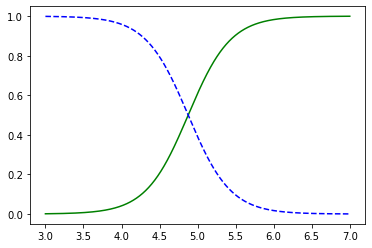

In [135]:
# 3 petal length
X_new3 = np.linspace(3, 7, 1000).reshape(-1, 1)
y_proba3 = log_reg3.predict_proba(X_new3)
plt.plot(X_new3, y_proba3[:, 1], "g-", label="Iris-Virginica") # _____
plt.plot(X_new3, y_proba3[:, 0], "b--", label="Not Iris-Virginica") # ------
decision_boundary3 = X_new3[y_proba3[:, 1] >= 0.5][0]
decision_boundary3

array([1.66066066])

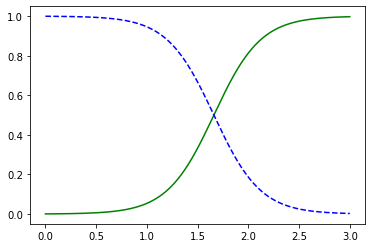

In [140]:
# 4 petal width
X_new4 = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba4 = log_reg4.predict_proba(X_new4)
plt.plot(X_new4, y_proba4[:, 1], "g-", label="Iris-Virginica") # _____
plt.plot(X_new4, y_proba4[:, 0], "b--", label="Not Iris-Virginica") # ------
decision_boundary4 = X_new4[y_proba4[:, 1] >= 0.5][0]
decision_boundary4

In [152]:
# unbestimmte iris 4.8,2.5,5.3,2.4
print(log_reg1.predict([[4.8]]), log_reg2.predict([[2.5]]), log_reg3.predict([[5.3]]), log_reg4.predict([[2.4]]))

[0] [0] [1] [1]


Nun nutzen wir alle Dimensionen 

In [175]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [176]:
x_train, x_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2, random_state=0)

In [177]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [178]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
                           random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [179]:
x_test = scaler.transform(x_test)

In [180]:
y_pred = model.predict(x_test)

In [181]:
model.score(x_train, y_train)

0.8583333333333333

In [182]:
model.score(x_test, y_test)

0.7

In [183]:
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0,  4,  9],
       [ 0,  0,  6]], dtype=int64)

In [184]:
iris['target_names'][model.predict([[4.8,2.5,5.3,2.4]])]

array(['virginica'], dtype='<U10')